In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import pickle

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
nTraj = 10000
time_step = 0.01
max_val = 50

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives


def createTraj(max_val, nPoints, time_step):
    traj = np.zeros((nPoints, 1, 3))
    # Randomize the starting point
    state0 = (random.randint(0,max_val),random.randint(0,max_val), random.randint(0,max_val))
    t = np.arange(0.0, nPoints*time_step, time_step)
    state = odeint(f, state0, t)
    traj[:,0,0] = state[:,0]/max_val
    traj[:,0,1] = state[:,1]/max_val
    traj[:,0,2] = state[:,2]/max_val
    return traj

# for k in range(len(sequence_length)):
data = []
l = 150
for i in range(nTraj):
    data.append(createTraj(max_val, l, time_step))
print(len(data))
with open('lorAttData/lorAtt_%d.pickle' % (l), 'wb') as f:
    pickle.dump(data, f)
        


10000


In [33]:
import pickle
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with open('lorAttData/lorAtt_150.pickle', 'rb') as f:
    data = pickle.load(f)


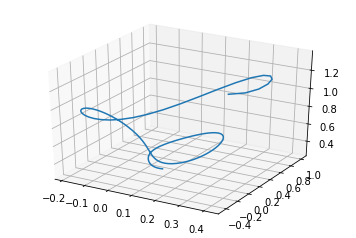

In [57]:
test= data[random.randint(0,len(data)-1)]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(test[:,0,0], test[:,0,1], test[:,0,2])
plt.show()

In [13]:
print(len(test))

120
